In [3]:
from vnstock import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from statsmodels.tsa.seasonal import seasonal_decompose
from random import randrange
from pandas import Series
import yfinance as yf
from datetime import datetime


In [2]:
df = stock_historical_data("VCB", "2023-01-01", "2023-09-28", "1D", 'stock')
# # lấy xuất data thành file csv
# df.to_csv('vcb_stock_data.csv', index=True)
print(df)

           time   open   high    low  close   volume ticker
0    2023-01-03  67910  69940  67910  69940  1089800    VCB
1    2023-01-04  70190  70190  69260  70110   837900    VCB
2    2023-01-05  70110  71130  69860  71130  1078600    VCB
3    2023-01-06  71130  71800  71040  71130  1125500    VCB
4    2023-01-09  72650  73580  71800  73580  1667100    VCB
..          ...    ...    ...    ...    ...      ...    ...
178  2023-09-22  86400  89500  86000  89300  2408600    VCB
179  2023-09-25  89000  89500  88300  89300  2210400    VCB
180  2023-09-26  89200  89400  86900  87000  1663200    VCB
181  2023-09-27  87600  89000  87000  87800  1204900    VCB
182  2023-09-28  87200  88300  86600  88000  1065100    VCB

[183 rows x 7 columns]


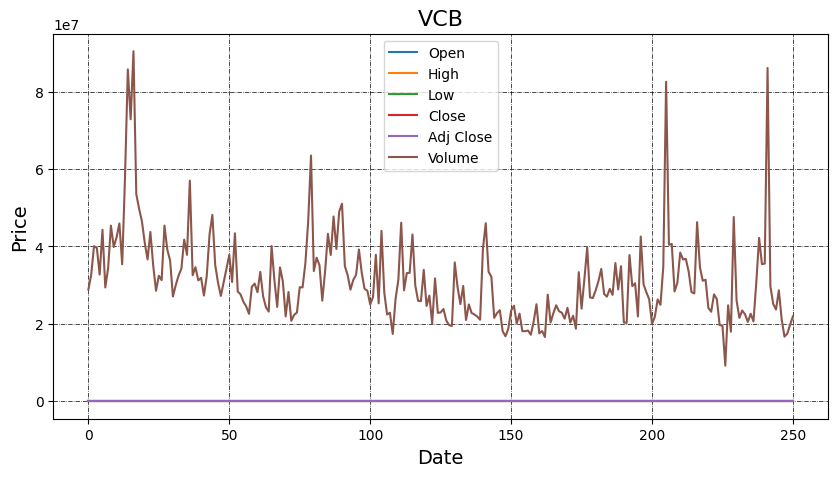

In [38]:
df.plot(figsize=(10, 5))
# Xác định nhãn cho tiêu đề của hình
plt.title("VCB", fontsize=16)
# Xác định nhãn cho trục x và trục y
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
# Vẽ các đường lưới
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

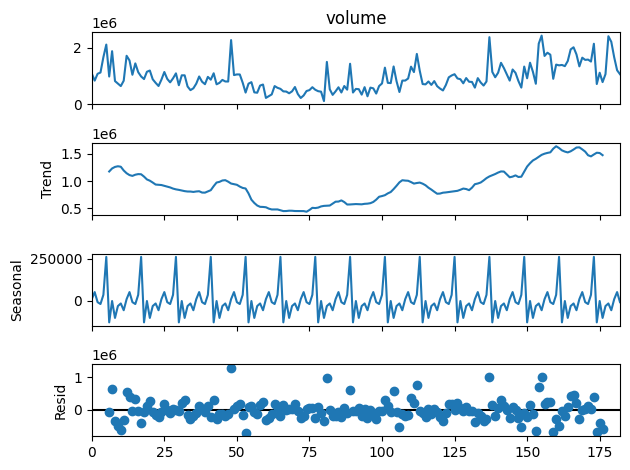

In [4]:
data = df['volume']
index = df.index
series = pd.Series(data)
result = seasonal_decompose(series, model='additive', period=12)
result.plot()
plt.show()

In [5]:
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
178   NaN
179   NaN
180   NaN
181   NaN
182   NaN
Name: trend, Length: 183, dtype: float64
0      10068.086971
1      52173.741733
2      -7708.996362
3     -18960.484458
4      35852.313161
           ...     
178   -15602.151124
179   -55795.603505
180    10068.086971
181    52173.741733
182    -7708.996362
Name: seasonal, Length: 183, dtype: float64
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
178   NaN
179   NaN
180   NaN
181   NaN
182   NaN
Name: resid, Length: 183, dtype: float64
0      1089800.0
1       837900.0
2      1078600.0
3      1125500.0
4      1667100.0
         ...    
178    2408600.0
179    2210400.0
180    1663200.0
181    1204900.0
182    1065100.0
Name: volume, Length: 183, dtype: float64


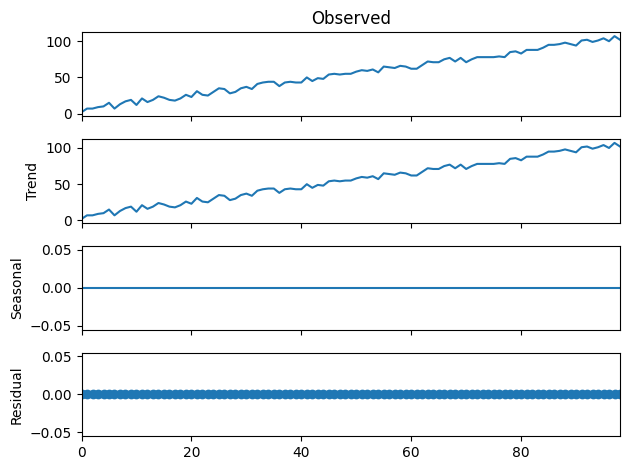

In [6]:
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
plt.show()

In [7]:
print(series)

[2, 7, 7, 9, 10, 15, 7, 13, 17, 19, 12, 21, 16, 19, 24, 22, 19, 18, 21, 26, 23, 31, 26, 25, 30, 35, 34, 28, 30, 35, 37, 34, 41, 43, 44, 44, 38, 43, 44, 43, 43, 50, 45, 49, 48, 54, 55, 54, 55, 55, 58, 60, 59, 61, 57, 65, 64, 63, 66, 65, 62, 62, 67, 72, 71, 71, 75, 77, 72, 77, 71, 75, 78, 78, 78, 78, 79, 78, 85, 86, 83, 88, 88, 88, 91, 95, 95, 96, 98, 96, 94, 101, 102, 99, 101, 104, 100, 107, 102]


In [ ]:
# series = pd.read_csv('/Users/hungtran/Python/VCB.csv', header=0, index_col='time')
# series.index = pd.to_datetime(series.index)
# result = seasonal_decompose(series['time'], model='multiplicative')
# result.plot()
# plt.show()

In [23]:

stock = 'MSFT'

# Fetch historical stock data using yfinance
df = yf.download(stock, start='2022-01-01', end='2022-12-31')

print(df)


[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  335.350006  338.000000  329.779999  334.750000  329.394867   
2022-01-04  334.829987  335.200012  326.119995  329.010010  323.746704   
2022-01-05  325.859985  326.070007  315.980011  316.380005  311.318726   
2022-01-06  313.149994  318.700012  311.489990  313.880005  308.858704   
2022-01-07  314.149994  316.500000  310.089996  314.040009  309.016144   
...                ...         ...         ...         ...         ...   
2022-12-23  236.110001  238.869995  233.940002  238.729996  237.112076   
2022-12-27  238.699997  238.929993  235.830002  236.960007  235.354095   
2022-12-28  236.889999  239.720001  234.169998  234.529999  232.940567   
2022-12-29  235.649994  241.919998  235.649994  241.009995  239.376648   
2022-12-30  238.210007  239.960007  236.660

In [11]:
import yfinance as yf

# List of ticker symbols
ticker_symbols = ['AAPL', 'MSFT', 'AMD', 'NVDA', 'TSM', 'INTEL', 'GOOG', 'HP', 'META', 'TSLA']

# Dictionary to store dataframes
stock_data = {}

# Download historical data for each ticker symbol
for symbol in ticker_symbols:
    stock_data[symbol] = yf.download(symbol, start='2021-01-01', end='2021-12-30')

# Accessing dataframes
df_aapl = stock_data['AAPL']
df_msft = stock_data['MSFT']
df_amd = stock_data['AMD']
df_nvda = stock_data['NVDA']
df_tsm = stock_data['TSM']
df_intel = stock_data['INTEL']
df_goog = stock_data['GOOG']
df_hp = stock_data['HP']
df_meta = stock_data['META']
df_tsla = stock_data['TSLA']

print(df_msft)

# df_aapl.to_csv('AAPL.csv',index=True)
# df_msft.to_csv('MSFT.csv',index=True)
# df_amd.to_csv('AMD.csv',index=True)
# df_nvda.to_csv('NVDA.csv',index=True)
# df_tsla.to_csv('TSLA.csv',index=True)
# df_tsm.to_csv(' TSM.csv',index=True)
# df_intel.to_csv('INTEL.csv',index=True)
# df_hp.to_csv('HP.csv',index=True)
# df_hp.to_csv('HP.csv', index=True)
# df_goog.to_csv('GOOG.csv',index=True)

In [26]:
# import yfinance as yf

# stock = 'MSFT'

# # Fetch historical stock data using yfinance
# df = yf.download(stock, start='2022-01-01', end='2022-12-31')

# # Save the DataFrame to a CSV file
# df.to_csv('msft_stock_data.csv', index=True)

[*********************100%%**********************]  1 of 1 completed


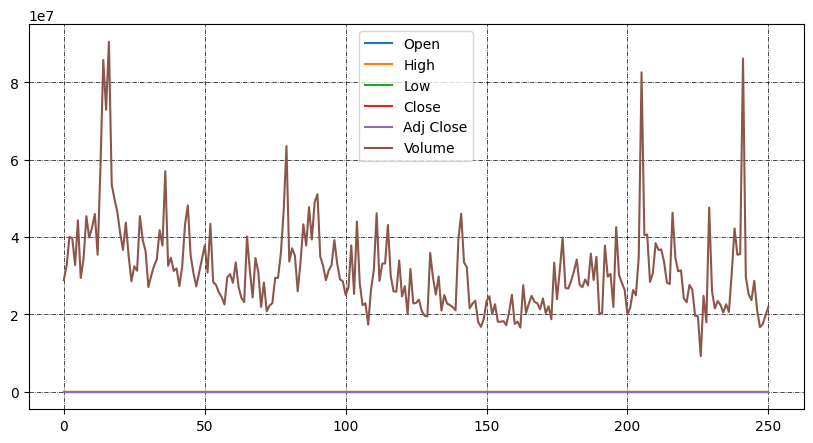

In [5]:
df = pd.read_csv('msft_stock_data.csv')

df.plot(figsize=(10, 5))

plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

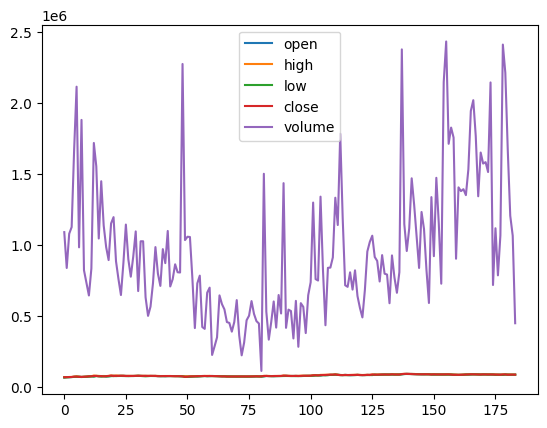

In [3]:
df = stock_historical_data("VCB", "2023-01-01", "2023-10-01", "1D", 'stock')

df.plot()
plt.show()

In [16]:
import pandas as pd
from datetime import datetime
import numpy as np
range_date = pd.date_range(start ='1//1/2019', 
                           end = '1/08/2019',
                                    req='Min')
df=pd.DataFrame(range_date,columns = ['date'])
df['data']=np.random.randint(0, 100,
                    size = len(range_date))
print(df.head(10))

                 date  data
0 2019-01-01 00:00:00    91
1 2019-01-01 00:01:00    21
2 2019-01-01 00:02:00    47
3 2019-01-01 00:03:00    66
4 2019-01-01 00:04:00    78
5 2019-01-01 00:05:00    87
6 2019-01-01 00:06:00    89
7 2019-01-01 00:07:00    60
8 2019-01-01 00:08:00    11
9 2019-01-01 00:09:00    45


In [17]:
import pandas as pd
from datetime import datetime
import numpy as np
range_date = pd.date_range(start ='1//1/2019',
                           end = '1/08/2019',
                                    freq='Min')
range_date

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 00:01:00',
               '2019-01-01 00:02:00', '2019-01-01 00:03:00',
               '2019-01-01 00:04:00', '2019-01-01 00:05:00',
               '2019-01-01 00:06:00', '2019-01-01 00:07:00',
               '2019-01-01 00:08:00', '2019-01-01 00:09:00',
               ...
               '2019-01-07 23:51:00', '2019-01-07 23:52:00',
               '2019-01-07 23:53:00', '2019-01-07 23:54:00',
               '2019-01-07 23:55:00', '2019-01-07 23:56:00',
               '2019-01-07 23:57:00', '2019-01-07 23:58:00',
               '2019-01-07 23:59:00', '2019-01-08 00:00:00'],
              dtype='datetime64[ns]', length=10081, freq='T')